# Name: Moiz Fakhruddin

## Email: moiz.fakhruddin2000@gmail.com

# Simple Linear Regression

### Task 1-- Prediction Using Supervised Machine Learning

In This task we have to predict the perccentage of an student based on its no of study hours.

#### Importing all needed packages for this task 

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#getting dataset

url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student_data = pd.read_csv(url)

print('Data imported successfully')
student_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Now, let's plot No of Hours against the Scores, to see how linear their relationship is:

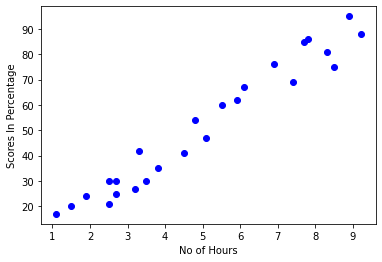

In [3]:
plt.scatter(student_data.Hours, student_data.Scores,  color='blue')
plt.xlabel("No of Hours")
plt.ylabel("Scores In Percentage")
plt.show()

###### From the above graph we can clearly see that there is a positive linear relationship between the two variable i.e Hours and Scores.

Which means if a student spent more time on its  studies he is ikely to get higher percentage in his result.

##### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [4]:
msk = np.random.rand(len(student_data)) < 0.8
train = student_data[msk]
test = student_data[~msk]

### Creating simple Regression Model

In [5]:
#using scikit-learn
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])

regr.fit(train_x, train_y)

print('Training Complete')

Training Complete


Text(0, 0.5, 'Scores In Percentage')

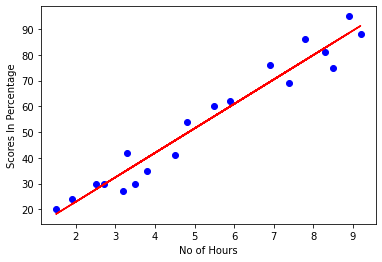

In [6]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("No of Hours")
plt.ylabel("Scores In Percentage")

#### Making Predictions

In [7]:
test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)
print("Actual Score")
print(test_y)
print("Predicted Score")
print(test_y_)

Actual Score
[[21]
 [47]
 [25]
 [85]
 [17]
 [67]]
Predicted Score
[[27.67451913]
 [52.34902018]
 [29.57255767]
 [77.02352122]
 [14.38824934]
 [61.83921288]]


### Evaluating the Model

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set

In [8]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 5.39
Residual sum of squares (MSE): 31.86
R2-score: 0.95
